# Exploratory Training Data Analysis

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.io as pio
from pdpbox import get_dataset, info_plots, pdp

%matplotlib inline
%config InlineBackend.figure_format ='retina'

import sys
import sklearn.neighbors._base
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base

pio.renderers.default = "notebook"
import plotly.figure_factory as ff
import plotly.offline as py

py.init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
import missingno as msno
import numpy
import plotly.graph_objs as go
import plotly.tools as tls
import scipy.cluster.hierarchy as hcluster
import scipy.cluster.hierarchy as shc
from missingpy import MissForest
from plotnine import *
from scipy.cluster.hierarchy import dendrogram, ward
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler

plt.style.use("ggplot")
import seaborn as sns
from matplotlib import pyplot
from pdpbox import get_dataset, info_plots, pdp
from sklearn.ensemble import (
    BaggingRegressor,
    GradientBoostingRegressor,
    RandomForestRegressor,
    StackingRegressor,
    VotingRegressor,
)
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.model_selection import train_test_split

sns.set_style("darkgrid")
sns.mpl.rcParams["figure.figsize"] = (15.0, 9.0)

import re

from scipy.cluster.hierarchy import dendrogram, linkage

regex = re.compile(r"\[|\]|<", re.IGNORECASE)

import gc
import warnings

warnings.filterwarnings("ignore")

import xgboost
from sklearn.model_selection import train_test_split

seed = 0

In [2]:
dataset = pd.read_csv("4l_predicted_data.txt", sep="\t")
dataset = dataset.rename({"IPA_BP": "IPA_BP_annotation"}, axis=1)
dataset.shape

(1720, 176)

In [3]:
data = dataset.drop(
    ["Gene"], 1
)  # recommended features to be removed by autoimpute package - due to zero values on fitting
print(data.shape)

(1720, 175)


In [4]:
data["BPlabel_encoded"] = data["BPlabel"].map(
   {"most likely": 1, "probable": 0.75, "possible":0.5, "least likely": 0.1}
)
Y = data["BPlabel_encoded"]

In [5]:
data.describe()

,REVEL.max,MetaSVM_rankscore.max,MetaLR_rankscore.max,MCAP.max,wgEncodeBroadHmmHuvecHMM.count,betamax,logpval_gwascatalog,Adipose - Subcutaneous_GTExTPM,Adipose - Visceral (Omentum)_GTExTPM,Adrenal Gland_GTExTPM,...,fathmm-MKL_coding_score,integrated_fitCons_score,GERP_Rankscore,interaction,SignalValue_H3k27me3_median,SignalValue_H3k9ac_median,SignalValue_H3k9me1_median,H4k20me1_count,SignalValue_H4k20me1_median,BPlabel_encoded
count,537.000000,494.000000,494.000000,4.000000,1720.000000,1647.000000,1210.000000,1614.000000,1614.000000,1614.000000,...,434.000000,434.000000,499.000000,0.0,886.000000,1345.000000,1264.000000,1093.000000,1093.000000,0.0
mean,0.148778,0.373824,0.107229,0.043350,246.680814,0.000445,38.616489,26.602433,23.582445,18.285199,...,0.802329,0.655078,0.609574,NaN,4.707774,17.511221,1.745731,180.954254,2.739059,NaN
std,0.143681,0.189240,0.216358,0.039999,525.992406,0.420701,128.922913,73.397775,66.290561,46.897834,...,0.300523,0.113663,0.284282,NaN,3.126928,10.975317,0.960583,267.466799,2.409102,NaN
min,0.000000,0.002000,0.000000,0.006878,1.000000,-1.322800,5.045757,0.000000,0.000000,0.000000,...,0.000840,0.000000,0.003930,NaN,1.161730,1.547590,1.070290,1.000000,1.084560,NaN
25%,0.052000,0.261250,0.000000,0.015171,25.000000,-0.377500,10.096910,0.289166,0.265373,0.237809,...,0.767613,0.615465,0.390055,NaN,2.359065,10.192600,1.294020,23.000000,1.655550,NaN
50%,0.102000,0.403500,0.001000,0.035455,73.000000,-0.144800,16.397940,7.373330,6.417765,4.930675,...,0.956715,0.706548,0.667420,NaN,3.519250,14.562900,1.505645,72.000000,2.014260,NaN
75%,0.202000,0.462750,0.082500,0.063634,251.000000,0.366650,31.034318,25.372625,22.006200,17.719300,...,0.984630,0.722319,0.853470,NaN,6.013930,22.347800,1.942900,229.000000,2.794620,NaN
max,0.858000,0.995000,0.991000,0.095610,9528.000000,1.280600,3494.397940,1006.600000,957.836000,713.710000,...,0.998630,0.777920,0.997070,NaN,21.164820,95.578500,13.794800,2259.000000,46.970800,NaN


### Plotting Data Missingness:

<AxesSubplot:>

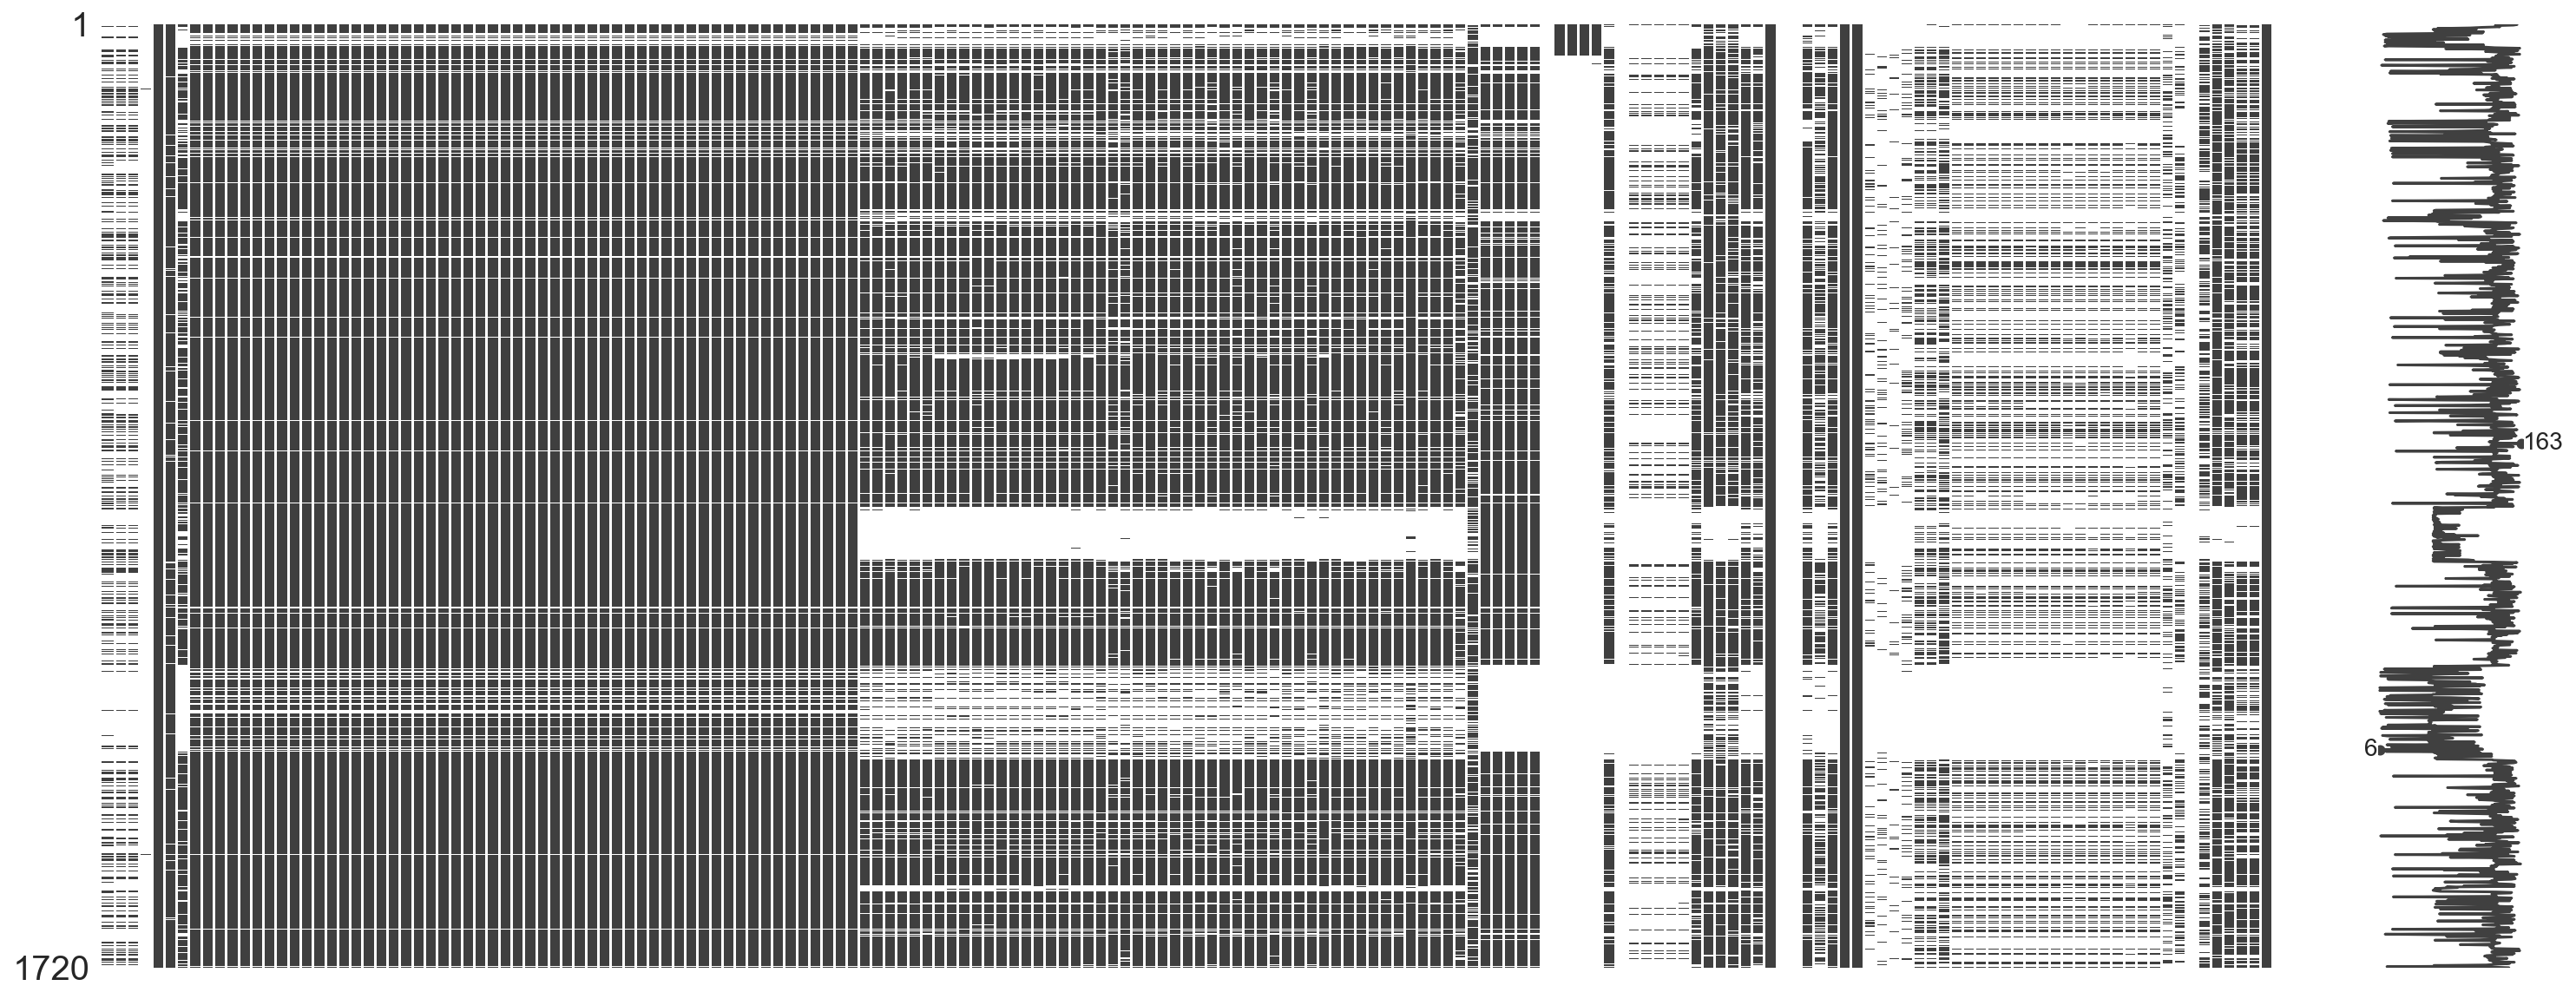

In [6]:
msno.matrix(data)
# msno.heatmap(data)

In [7]:
data.isnull().sum()

REVEL.max                         1183
MetaSVM_rankscore.max             1226
MetaLR_rankscore.max              1226
MCAP.max                          1716
wgEncodeBroadHmmHuvecHMM.count       0
                                  ... 
SignalValue_H3k9me1_median         456
H4k20me1_count                     627
SignalValue_H4k20me1_median        627
BPlabel                              0
BPlabel_encoded                   1720
Length: 176, dtype: int64

In [8]:
natest = data.isnull().sum()
natest.sort_values(inplace=True)
# natest.to_csv('traininggenes_features_with_NA.csv')

In [9]:
percent_missing = data.isnull().sum() * 100 / len(data)
missing_value_df = pd.DataFrame(
    {"column_name": data.columns, "percent_missing": percent_missing}
)
missing_value_df.sort_values("percent_missing", inplace=True)

In [10]:
natest = natest.to_frame()
missingdata = natest.join(missing_value_df)

In [11]:
missingdata.to_csv("unknownggenes_features_with_NA.csv")

<BarContainer object of 176 artists>

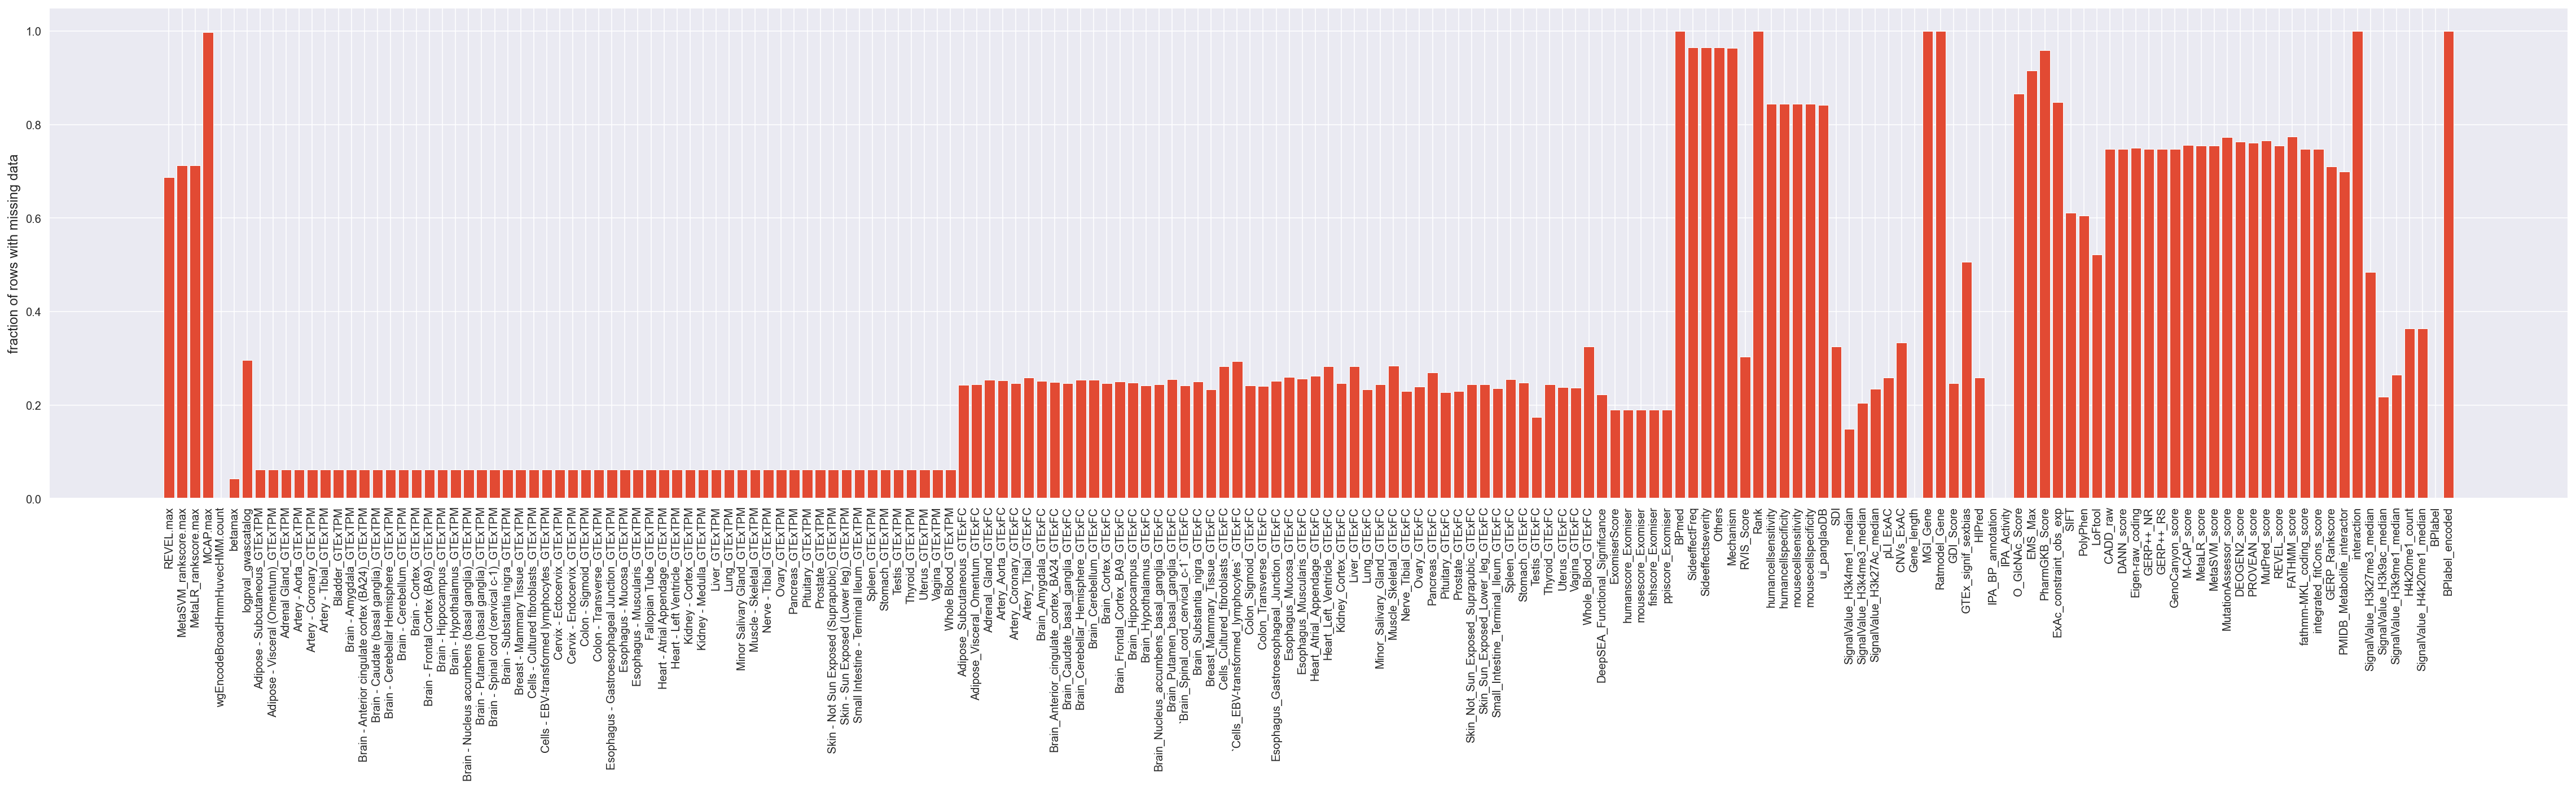

In [12]:
null_counts = data.isnull().sum() / len(data)
plt.figure(figsize=(40, 8))
plt.xticks(np.arange(len(null_counts)) + 0.0, null_counts.index, rotation="vertical")
plt.ylabel("fraction of rows with missing data")
plt.bar(np.arange(len(null_counts)), null_counts)

<BarContainer object of 8 artists>

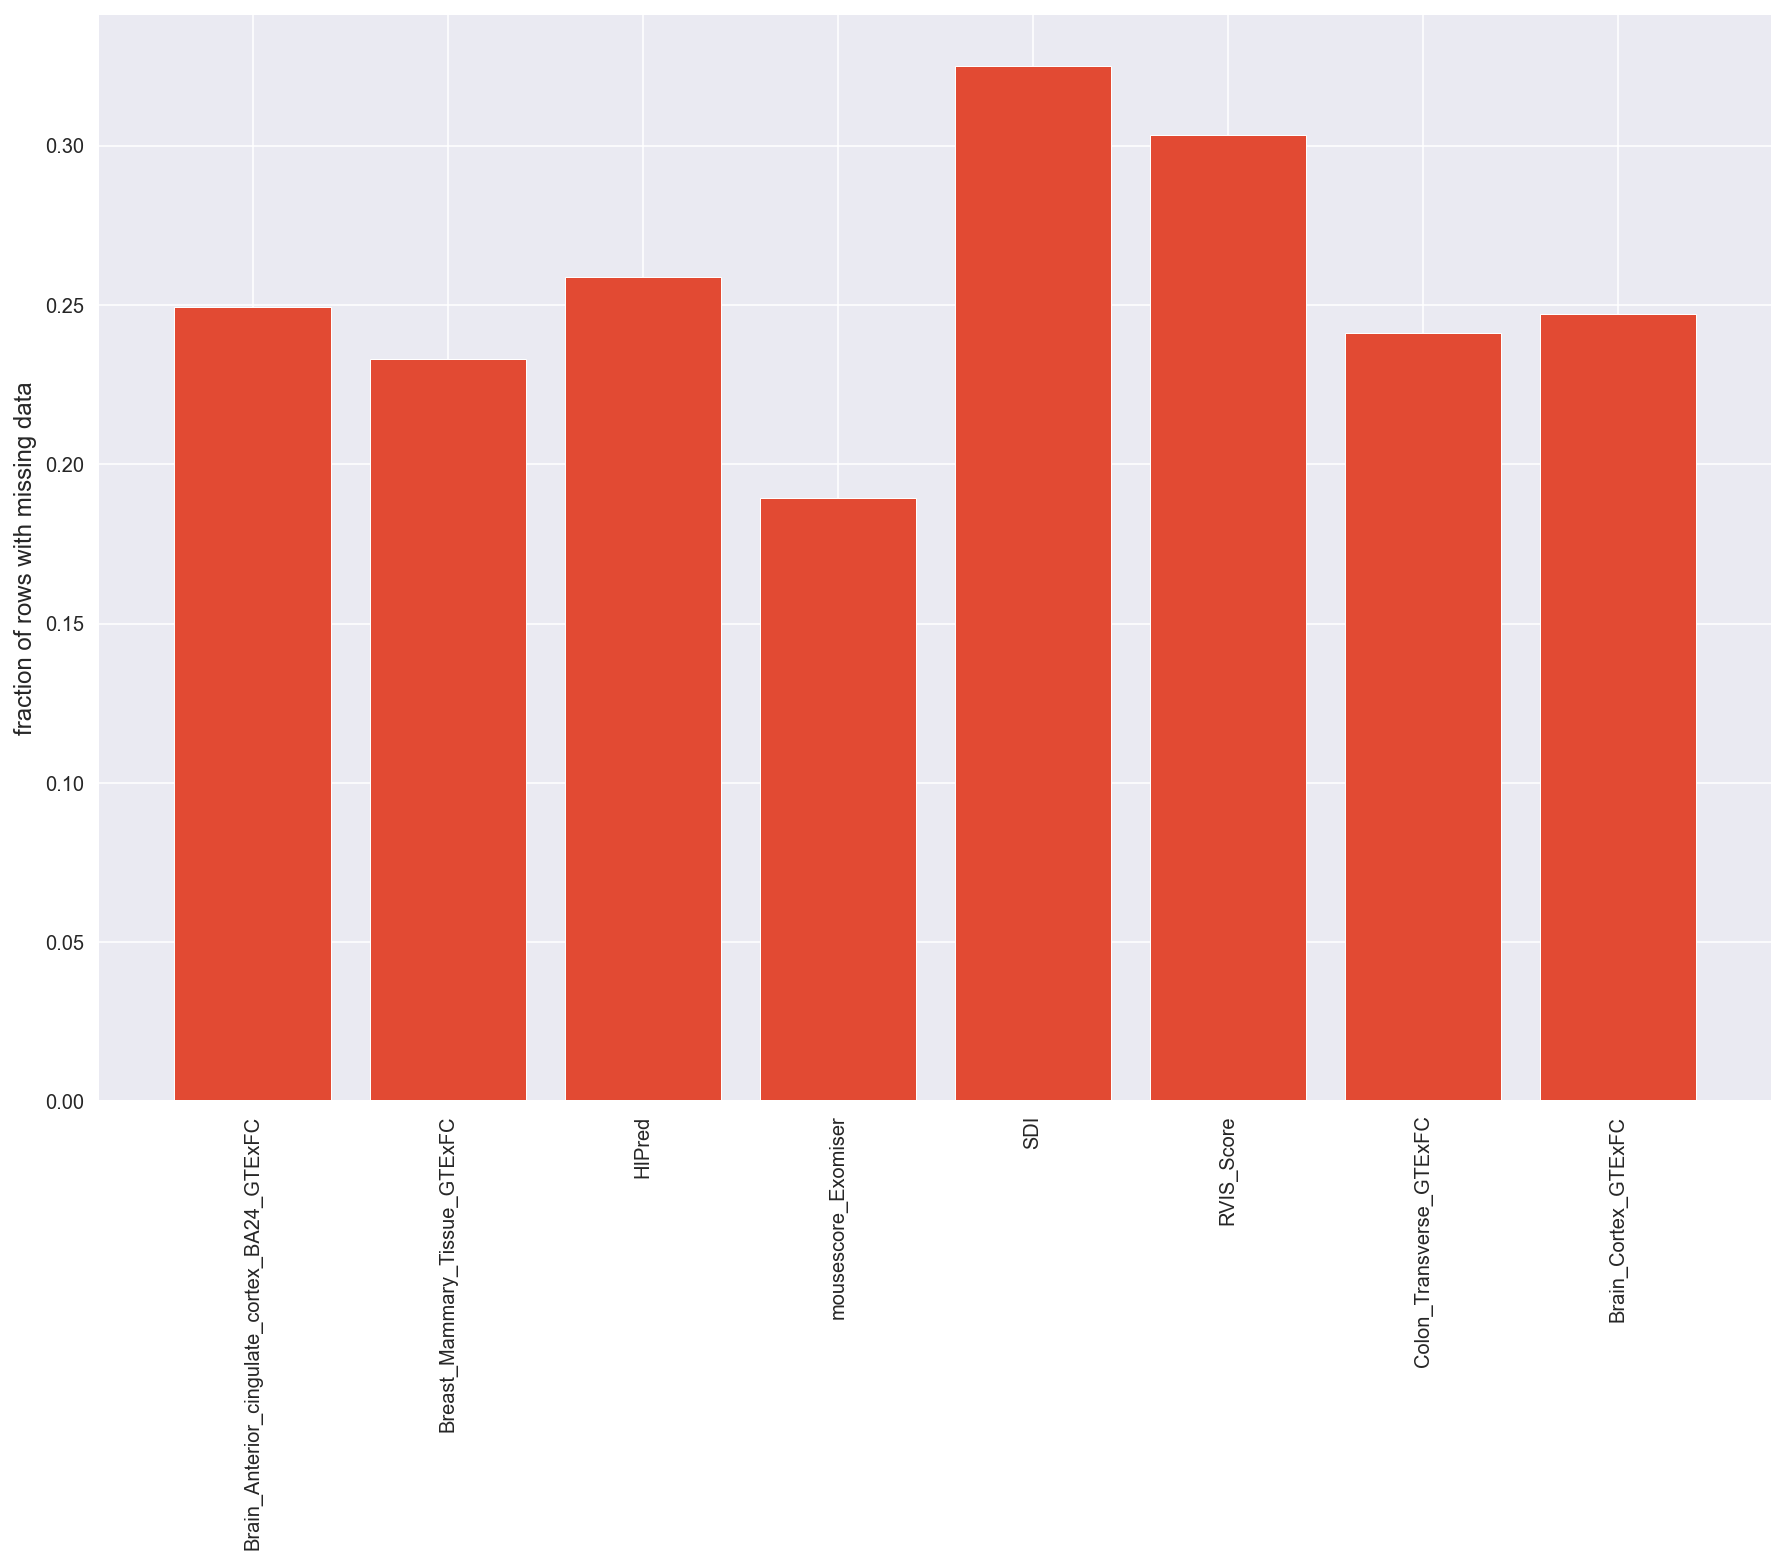

In [13]:
data_selected = data[
    [
'Brain_Anterior_cingulate_cortex_BA24_GTExFC', 'Breast_Mammary_Tissue_GTExFC', 'HIPred', 'mousescore_Exomiser', 'SDI', 'RVIS_Score', 'Colon_Transverse_GTExFC', 'Brain_Cortex_GTExFC'
    ]
]
null_counts = data_selected.isnull().sum() / len(data_selected)
plt.figure(figsize=(15, 10))
plt.xticks(np.arange(len(null_counts)) + 0.0, null_counts.index, rotation="vertical")
plt.ylabel("fraction of rows with missing data")
plt.bar(np.arange(len(null_counts)), null_counts)

In [14]:
selection = dataset[
    [
        "Gene",
        "BPlabel",
'Brain_Anterior_cingulate_cortex_BA24_GTExFC', 'Breast_Mammary_Tissue_GTExFC', 'HIPred', 'mousescore_Exomiser', 'SDI', 'RVIS_Score', 'Colon_Transverse_GTExFC', 'Brain_Cortex_GTExFC'
        "Gene_length",
    ]
]

KeyError: "['Brain_Cortex_GTExFCGene_length'] not in index"

In [ ]:
dt2 = selection
dat = dt2.set_index("Gene")

## Feature Correlation:

In [ ]:
df = dt2
df = df.set_index("Gene")
# df["BPlabel_encoded"] = df["BPlabel"].map(
#   {"most likely": 1, "probable": 0.75, "possible":0.5, "least likely": 0.1}
# )

# removing remaining variant-level features strongly correlating with gene length:
df = df.drop(["BPlabel", "Gene_length"], 1,)
df.shape

In [ ]:
X = MinMaxScaler().fit_transform(df)
imputer = MissForest(random_state=seed)
X = pd.DataFrame(imputer.fit_transform(X), index=df.index, columns=df.columns)

In [ ]:
Xcor = X

Xcor = pd.DataFrame(data=Xcor, columns=X.columns)

corr = Xcor.corr(method="spearman")

f, ax = plt.subplots(figsize=(60, 50))

cmap = sns.diverging_palette(10, 275, as_cmap=True)

sns.set(font_scale=3)

sns.heatmap(
    corr,
    cmap=cmap,
    square=True,
    xticklabels=True,
    yticklabels=True,
    linewidths=0.5,
    annot_kws={"size":30},
    ax=ax,
)

corr_matrix = data.corr()
# print(corr_matrix["BPlabel_encoded"].sort_values(ascending=False))
# corr = corr_matrix["BPlabel_encoded"].sort_values(ascending=False)

In [ ]:
corr.to_csv("unknown_correlation.csv", header=True)

In [ ]:
corr = X.corr()
corr.head()

In [ ]:
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
to_drop

### Viewing genes >25% missing rowwise for selected features (after running BorutaShap)

In [ ]:
dt = dt2[
    [
     'Brain_Anterior_cingulate_cortex_BA24_GTExFC', 'Breast_Mammary_Tissue_GTExFC', 'HIPred', 'mousescore_Exomiser', 'SDI', 'RVIS_Score', 'Colon_Transverse_GTExFC', 'Brain_Cortex_GTExFC'
    ]
]

In [ ]:
dt["missing_count"] = dt.isnull().sum(axis=1)  # dt.apply(lambda x: x.count(), axis=1)

dt["missing_percentage"] = (dt["missing_count"] / 19) * 100

dt.sort_values("missing_percentage", inplace=True)
print(dt[["missing_count", "missing_percentage"]])
# dt.shape

In [ ]:
dtmissing = dt.loc[dt["missing_percentage"] > 25]
dtmissing

### Feature distribution:

In [ ]:
def draw_histograms(dataf, variables, n_rows, n_cols):
    fig = plt.figure()
    for i, var_name in enumerate(variables):
        ax = fig.add_subplot(n_rows, n_cols, i + 1)
        df[var_name].hist(
            bins=40,
            linewidth=1.0,
            xlabelsize=18,
            ylabelsize=18,
            figsize=(30, 30),
            ax=ax,
        )
        ax.set_title(var_name + " Distribution")
    fig.tight_layout()
    plt.suptitle("Predicted Data Univariate Plots", y=1.02, fontsize=35)
    plt.savefig(
        "predicted_gene_feature_distribution.png", format="png", dpi=300, bbox_inches="tight"
    )
    plt.show()


#test = pd.DataFrame(np.random.randn(30, 9), columns=map(str, range(9)))
#draw_histograms(dt, dt.columns, 4, 2)

In [ ]:
# features only selected by BorutaShap:
sns.set(font_scale=2)
features_list = [
     'Brain_Anterior_cingulate_cortex_BA24_GTExFC', 'Breast_Mammary_Tissue_GTExFC', 'HIPred', 'mousescore_Exomiser', 'SDI', 'RVIS_Score', 'Colon_Transverse_GTExFC', 'Brain_Cortex_GTExFC'
]


axarr = dt[features_list].hist(
    bins=40,
    edgecolor="b",
    linewidth=1.0,
    xlabelsize=14,
    ylabelsize=14,
    # grid=False,
    figsize=(30, 25),
    color="cornflowerblue",
)

for ax in axarr.flatten():
    ax.set_ylabel("Count")

plt.tight_layout()
plt.grid(axis="x", color="0.95")
plt.suptitle("Predicted Data Univariate Plots", y=1.02, fontsize=35)

plt.savefig(
    "predicted_gene_feature_distribution.png", format="png", dpi=300, bbox_inches="tight"
)

### Covariation Heatmaps:

In [ ]:
mean_vec = np.mean(Xcor, axis=0)
cov_mat = (Xcor - mean_vec).T.dot((Xcor - mean_vec)) / (Xcor.shape[0] - 1)
# print('Covariance matrix \n%s' %cov_mat)
sns.set(font_scale=1)
plt.figure(figsize=(20, 20))
sns.heatmap(cov_mat, vmax=1, square=True, cmap="cubehelix")

plt.title("Covariance between different features")

### Clustering to view training data grouping:

#### PCA Explained Variance 
- for deciding n components in hierarchal clustering

In [ ]:
X2 = X[[  'Brain_Anterior_cingulate_cortex_BA24_GTExFC', 'Breast_Mammary_Tissue_GTExFC', 'HIPred', 'mousescore_Exomiser', 'SDI', 'RVIS_Score', 'Colon_Transverse_GTExFC', 'Brain_Cortex_GTExFC',]]
mean_vec = np.mean(X2, axis=0)
cov_mat = (X2 - mean_vec).T.dot((X2 - mean_vec)) / (X2.shape[0] - 1)

In [ ]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print("Eigenvectors \n%s" % eig_vecs)
print("\nEigenvalues \n%s" % eig_vals)


# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:, i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print("Eigenvalues in descending order:")
for i in eig_pairs:
    print(i[0])

In [ ]:
tot = sum(eig_vals)
var_exp = [(i / tot) * 100 for i in sorted(eig_vals, reverse=True)]
len(var_exp)

In [ ]:
sns.set(font_scale=1)
plt.figure(figsize=(6, 4))

plt.bar(
    range(8), var_exp, alpha=0.5, align="center", label="individual explained variance"
)
plt.ylabel("Explained variance ratio")
plt.xlabel("Principal components")
plt.legend(loc="best")
plt.tight_layout()

In [ ]:
from sklearn.decomposition import PCA

pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0, 7, 1)
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")

## Hierarchal Clustering

### All training data:

In [ ]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop("max_d", None)
    if max_d and "color_threshold" not in kwargs:
        kwargs["color_threshold"] = max_d
    annotate_above = kwargs.pop("annotate_above", 0)
    plt.figure(figsize=(15, 10))
    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get("no_plot", False):
        plt.title("Hierarchical Clustering Dendrogram (truncated)")
        plt.xlabel("sample index or (cluster size)")
        plt.ylabel("distance")
        for i, d, c in zip(ddata["icoord"], ddata["dcoord"], ddata["color_list"]):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, "o", c=c)
                plt.annotate(
                    "%.3g" % y,
                    (x, y),
                    xytext=(0, -5),
                    textcoords="offset points",
                    va="top",
                    ha="center",
                )
        if max_d:
            plt.axhline(y=max_d, c="k")
    return ddata

In [ ]:
linked_array = ward(X2)

fancy_dendrogram(
    linked_array,
    truncate_mode="lastp",
    p=30,
    leaf_rotation=90.0,
    leaf_font_size=12.0,
    show_contracted=True,
    annotate_above=10,
    max_d=80,
)

plt.show()

In [ ]:
X2.shape

In [ ]:
# Reducing the dimensions of the data
pca = PCA(n_components=2)
X_principal = pca.fit_transform(X)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ["P1", "P2"]

In [ ]:
silhouette_scores = []

for n_cluster in range(2, 8):
    silhouette_scores.append(
        silhouette_score(
            X_principal,
            AgglomerativeClustering(n_clusters=n_cluster).fit_predict(X_principal),
        )
    )

# Plotting a bar graph to compare the results
k = [2, 3, 4, 5, 6, 7]
plt.bar(k, silhouette_scores)
plt.xlabel("Number of clusters", fontsize=10)
plt.ylabel("Silhouette Score", fontsize=10)
plt.show()

In [ ]:
agg = AgglomerativeClustering(n_clusters=3)
agg.fit(X_principal)

sns.set(font_scale=1)
plt.scatter(
    X_principal["P1"],
    X_principal["P2"],
    c=AgglomerativeClustering(n_clusters=3).fit_predict(X_principal),
    cmap=plt.cm.winter,
)
plt.show()

### Elbow and silhouette scores - no PCA

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

twss = []
sa = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++")
    kmeans.fit(X2)
    Ypreds = kmeans.predict(X2)
    twss.append(kmeans.inertia_)
    if i > 1:
        sa.append(silhouette_score(X2, Ypreds))


plt.plot(range(1, 11), twss)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Total within-cluster sum of squares")

In [ ]:
plt.plot(range(2, 11), sa)
plt.title("silhouette analysis")
plt.xlabel("Number of Clusters")
plt.ylabel("Average silhouette score")